In [30]:
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [69]:
name = 'benzene_old_dft'

In [70]:
benzene_data = np.load("{}.npz".format(name))

In [71]:
print(benzene_data.files)

['E', 'name', 'F', 'theory', 'R', 'z', 'type', 'md5']


In [72]:
for i in benzene_data.files:
    print(i, benzene_data[i].shape)

E (627983, 1)
name ()
F (627983, 12, 3)
theory ()
R (627983, 12, 3)
z (12,)
type ()
md5 ()


In [73]:
configs = benzene_data['R']

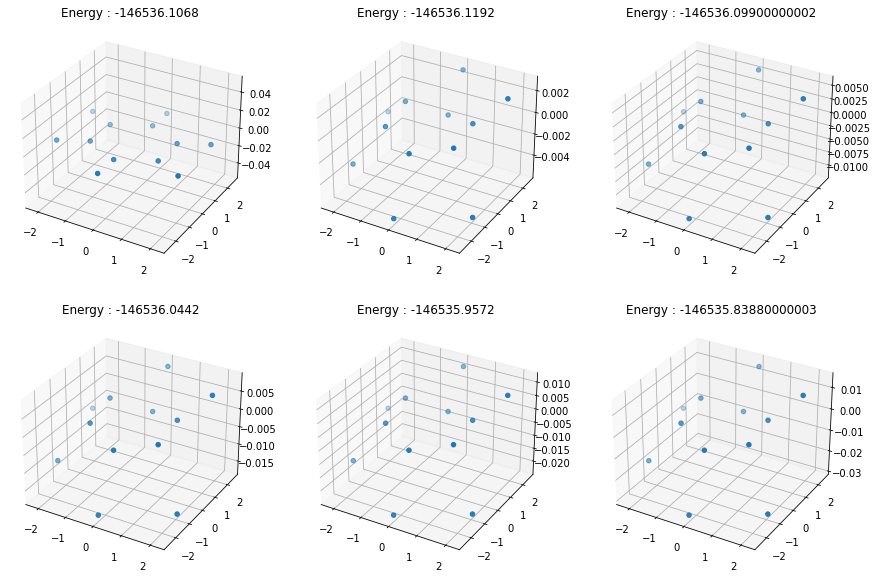

In [74]:
fig = plt.figure(figsize = (15, 10))

for num in range(6):
    ax = fig.add_subplot(2, 3, num + 1, projection = '3d')
    i = configs[num]
    ax.scatter(i[:, 0], i[:, 1], i[:, 2])
    ax.set_title("Energy : {}".format(benzene_data['E'][num][0]))
plt.savefig('configurations.png')

### Label statistics

In [75]:
benzene_data['E'].shape

(627983, 1)

In [76]:
hist, a = np.histogram(benzene_data['E'], bins = 10)

In [77]:
print(a)

[-146536.1192  -146533.87086 -146531.62252 -146529.37418 -146527.12584
 -146524.8775  -146522.62916 -146520.38082 -146518.13248 -146515.88414
 -146513.6358 ]


In [78]:
print(hist)

[    32   9893 107128 234148 182242  72754  17693   3412    619     62]


In [82]:
from matplotlib import colors

Text(0.5, 1.0, 'Benzene Label Statistics')

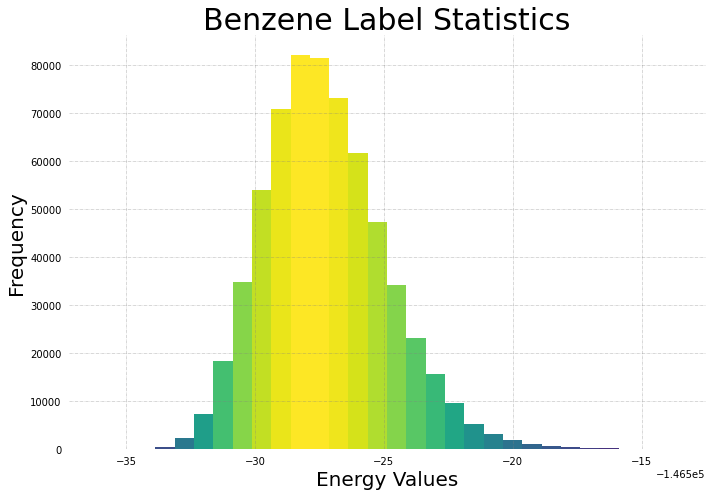

In [80]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7), 
                        tight_layout = True)
for s in ['top', 'bottom', 'left', 'right']: 
    axs.spines[s].set_visible(False) 
    
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 

N, bins, patches = axs.hist(benzene_data['E'], bins = 30)
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
axs.xaxis.set_ticks_position('none') 
axs.yaxis.set_ticks_position('none')

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
axs.set_xlabel("Energy Values", fontsize = 20)
axs.set_ylabel("Frequency", fontsize = 20)

axs.set_title("Benzene Label Statistics", fontsize = 30)

plt.savefig("{}.png".format(name))